In [ ]:
# default_exp deephelper

# deephelper

> Functions for auto-suggestion

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
#hide
from nbdev.showdoc import *

In [ ]:
#export 
import cv2
import os
import kornia as K
import kornia.feature as KF
import kornia.geometry as KG
import os
import torch
from copy import deepcopy
from kornia_moons.feature import *
from pixelstitch.io import *
from pixelstitch.metrics import *
from pixelstitch.core import *


import numpy as np
import torch
import imageio

from pixelstitch.COTR.COTR.utils import utils, debug_utils
from pixelstitch.COTR.COTR.models import build_model
from pixelstitch.COTR.COTR.options.options import *
from pixelstitch.COTR.COTR.options.options_utils import *
from pixelstitch.COTR.COTR.inference.inference_helper import triangulate_corr
from pixelstitch.COTR.COTR.inference.sparse_engine import SparseEngine

class Bunch(object):
    def __init__(self, adict):
        self.__dict__.update(adict)
    
cotr_default_opts = {'backbone': 'resnet50',
 'hidden_dim': 256,
 'dilation': False,
 'dropout': 0.1,
 'nheads': 8,
 'layer': 'layer3',
 'enc_layers': 6,
 'dec_layers': 6,
 'position_embedding': 'lin_sine',
 'out_dir': './out',
 'load_weights': None,
 'faster_infer': True,
 'command': '',
 'dim_feedforward': 1024,
 'load_weights_path': '/Users/oldufo/dev/correspondence_annotator/pixelstitch/COTR/out/default/checkpoint.pth.tar'}


class COTRHelper():
    def __init__(self, opt=cotr_default_opts, on_gpu = False):
        self.on_gpu = on_gpu
        opt = Bunch(opt)
        self.model = build_model(opt)
        weights = torch.load(opt.load_weights_path, map_location='cpu')['model_state_dict']
        utils.safe_load_weights(self.model, weights)
        if self.on_gpu:
            self.model = self.model.cuda()
        self.model = self.model.eval()
        self.engine = SparseEngine(self.model, 32, mode='tile')
        return
    def add_images(self, img_a, img_b):
        self.img_a = img_a
        self.img_b = img_b
        return
    def suggest_correspondence(self, xy, on_left: bool):
        num =len(xy)
        assert xy.shape[1] == 2
        corrs = self.engine.cotr_corr_multiscale(self.img_a if on_left else self.img_b,
                                                 self.img_b if on_left else self.img_a,
                                                 np.linspace(0.5, 0.0625, 4),
                                                  1, max_corrs=num, queries_a=xy, force=True)
        return corrs

/opt/homebrew/Caskroom/miniforge/base/envs/python39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
fnames =['/Users/oldufo/dev/new-wxbs-ft/WxBS/WGLBS/ministry/01.png', '/Users/oldufo/dev/new-wxbs-ft/WxBS/WGLBS/ministry/02.png']
img1 = imread(fnames[0])
img2 = imread(fnames[1])



/opt/homebrew/Caskroom/miniforge/base/envs/python39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
cotr = COTRHelper()


/opt/homebrew/Caskroom/miniforge/base/envs/python39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


using lin_sine as positional encoding
freeze conv1.weight
freeze layer1.0.conv1.weight
freeze layer1.0.conv2.weight
freeze layer1.0.conv3.weight
freeze layer1.0.downsample.0.weight
freeze layer1.1.conv1.weight
freeze layer1.1.conv2.weight
freeze layer1.1.conv3.weight
freeze layer1.2.conv1.weight
freeze layer1.2.conv2.weight
freeze layer1.2.conv3.weight
freeze layer2.0.conv1.weight
freeze layer2.0.conv2.weight
freeze layer2.0.conv3.weight
freeze layer2.0.downsample.0.weight
freeze layer2.1.conv1.weight
freeze layer2.1.conv2.weight
freeze layer2.1.conv3.weight
freeze layer2.2.conv1.weight
freeze layer2.2.conv2.weight
freeze layer2.2.conv3.weight
freeze layer2.3.conv1.weight
freeze layer2.3.conv2.weight
freeze layer2.3.conv3.weight
freeze layer3.0.conv1.weight
freeze layer3.0.conv2.weight
freeze layer3.0.conv3.weight
freeze layer3.0.downsample.0.weight
freeze layer3.1.conv1.weight
freeze layer3.1.conv2.weight
freeze layer3.1.conv3.weight
freeze layer3.2.conv1.weight
freeze layer3.2.conv2.

In [ ]:
cotr.add_images(img1, img2)

/opt/homebrew/Caskroom/miniforge/base/envs/python39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
corrs = np.loadtxt('/Users/oldufo/dev/new-wxbs-ft/WxBS/WGLBS/ministry/corrs.txt')

/opt/homebrew/Caskroom/miniforge/base/envs/python39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
corrs[:1,:2]

/opt/homebrew/Caskroom/miniforge/base/envs/python39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[538.26917, 320.12343]])

In [ ]:
xy_right = cotr.suggest_correspondence(corrs[:,:2], True)

/opt/homebrew/Caskroom/miniforge/base/envs/python39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/oldufo/dev/correspondence_annotator/pixelstitch/COTR/COTR/inference/inference_helper.py:49: UserWarning: Spatial smoothness in dense optical flow is lost, but sparse matching and triangulation should be fine
  warnings.warn('Spatial smoothness in dense optical flow is lost, but sparse matching and triangulation should be fine')
/opt/homebrew/Caskroom/miniforge/base/envs/python39/lib/python3.9/site-packages/torch/nn/functional.py:3983: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior

0 / 20 | 0 / 20
0 / 20 | 0 / 20
0 / 20 | 0 / 20
0 / 20 | 0 / 20
18 / 20 | 20 / 20


In [ ]:
print (xy_right.shape)

(42, 4)


/opt/homebrew/Caskroom/miniforge/base/envs/python39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
both = np.stack([corrs[:,2:], xy_right[:,2:]],axis=-1)


/opt/homebrew/Caskroom/miniforge/base/envs/python39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
both.shape

/opt/homebrew/Caskroom/miniforge/base/envs/python39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(42, 2, 2)

/opt/homebrew/Caskroom/miniforge/base/envs/python39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


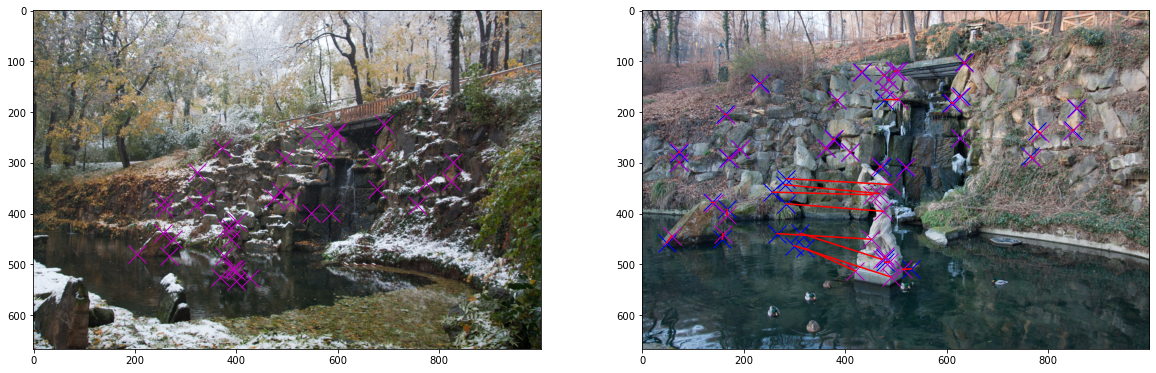

In [ ]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img1)
ax2.imshow(img2)
ax1.plot(corrs[:,0], corrs[:,1], 'mx', markersize=18)
ax2.plot(xy_right[:,2], xy_right[:,3], 'bx', markersize=18)
ax2.plot(corrs[:,2], corrs[:,3], 'mx', markersize=18)

_ = ax2.plot(both[:,0].T, both[:,1].T, 'r-', markersize=18)










In [ ]:
xy_right = cotr.suggest_correspondence(corrs[:,:2], True)

/opt/homebrew/Caskroom/miniforge/base/envs/python39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/oldufo/dev/correspondence_annotator/pixelstitch/COTR/COTR/inference/inference_helper.py:49: UserWarning: Spatial smoothness in dense optical flow is lost, but sparse matching and triangulation should be fine
  warnings.warn('Spatial smoothness in dense optical flow is lost, but sparse matching and triangulation should be fine')
/opt/homebrew/Caskroom/miniforge/base/envs/python39/lib/python3.9/site-packages/torch/nn/functional.py:3983: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior

0 / 20 | 0 / 20
0 / 20 | 0 / 20
0 / 20 | 0 / 20
0 / 20 | 0 / 20
18 / 20 | 20 / 20


In [ ]:
corrs.shape

/opt/homebrew/Caskroom/miniforge/base/envs/python39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(20, 4)

/opt/homebrew/Caskroom/miniforge/base/envs/python39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


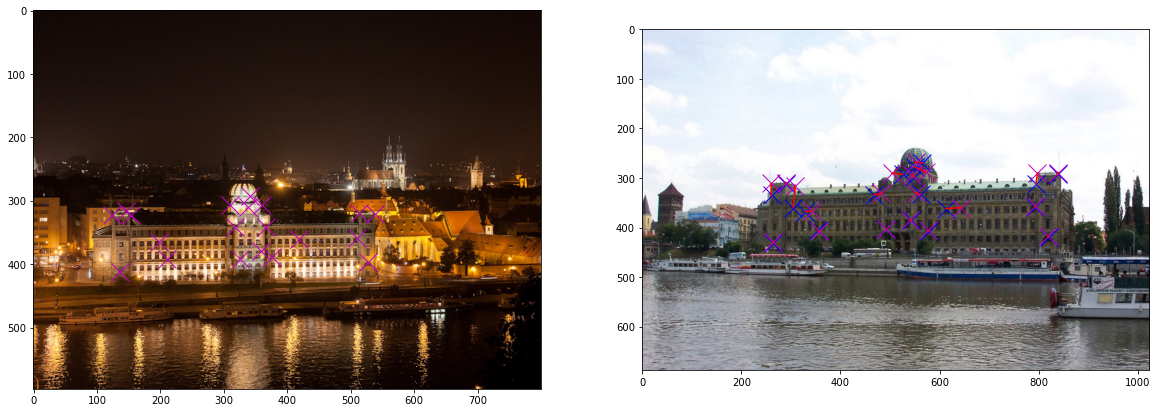

In [ ]:
#fast inference
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img1)
ax2.imshow(img2)
ax1.plot(corrs[:,0], corrs[:,1], 'mx', markersize=18)
ax2.plot(xy_right[:,2], xy_right[:,3], 'bx', markersize=18)
both = np.stack([corrs[:,2:], xy_right[:,2:]],axis=-1)


ax2.plot(corrs[:,2], corrs[:,3], 'mx', markersize=18)

_ = ax2.plot(both[:,0].T, both[:,1].T, 'r-', markersize=18)







/opt/homebrew/Caskroom/miniforge/base/envs/python39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


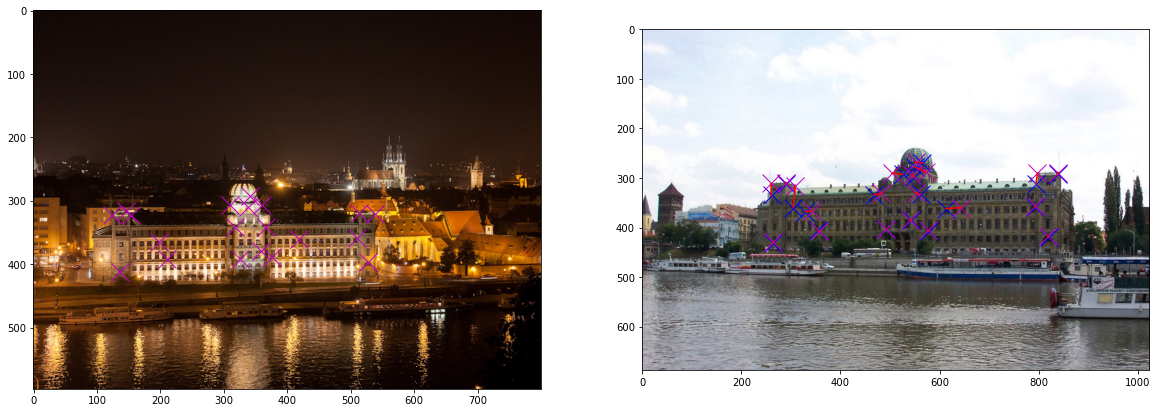

In [ ]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img1)
ax2.imshow(img2)
ax1.plot(corrs[:,0], corrs[:,1], 'mx', markersize=18)
ax2.plot(xy_right[:,2], xy_right[:,3], 'bx', markersize=18)
both = np.stack([corrs[:,2:], xy_right[:,2:]],axis=-1)


ax2.plot(corrs[:,2], corrs[:,3], 'mx', markersize=18)

_ = ax2.plot(both[:,0].T, both[:,1].T, 'r-', markersize=18)











In [ ]:
fnames =['/Users/oldufo/dev/new-wxbs-ft/WxBS/WGABS/vatutin/01.png', '/Users/oldufo/dev/new-wxbs-ft/WxBS/WGABS/vatutin/02.png']
img1 = imread(fnames[0])
img2 = imread(fnames[1])




/opt/homebrew/Caskroom/miniforge/base/envs/python39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
corrs = np.loadtxt('/Users/oldufo/dev/new-wxbs-ft/WxBS/WGABS/vatutin/corrs.txt')

/opt/homebrew/Caskroom/miniforge/base/envs/python39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
corrs.shape

/opt/homebrew/Caskroom/miniforge/base/envs/python39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(27, 4)

In [ ]:
cotr.add_images(img1, img2)
xy_right = cotr.suggest_correspondence(corrs[:,:2], True)

/opt/homebrew/Caskroom/miniforge/base/envs/python39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/oldufo/dev/correspondence_annotator/pixelstitch/COTR/COTR/inference/inference_helper.py:49: UserWarning: Spatial smoothness in dense optical flow is lost, but sparse matching and triangulation should be fine
  warnings.warn('Spatial smoothness in dense optical flow is lost, but sparse matching and triangulation should be fine')
/opt/homebrew/Caskroom/miniforge/base/envs/python39/lib/python3.9/site-packages/torch/nn/functional.py:3983: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior

0 / 27 | 0 / 27
0 / 27 | 0 / 27
0 / 27 | 0 / 27
0 / 27 | 0 / 27
12 / 27 | 27 / 27


/opt/homebrew/Caskroom/miniforge/base/envs/python39/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


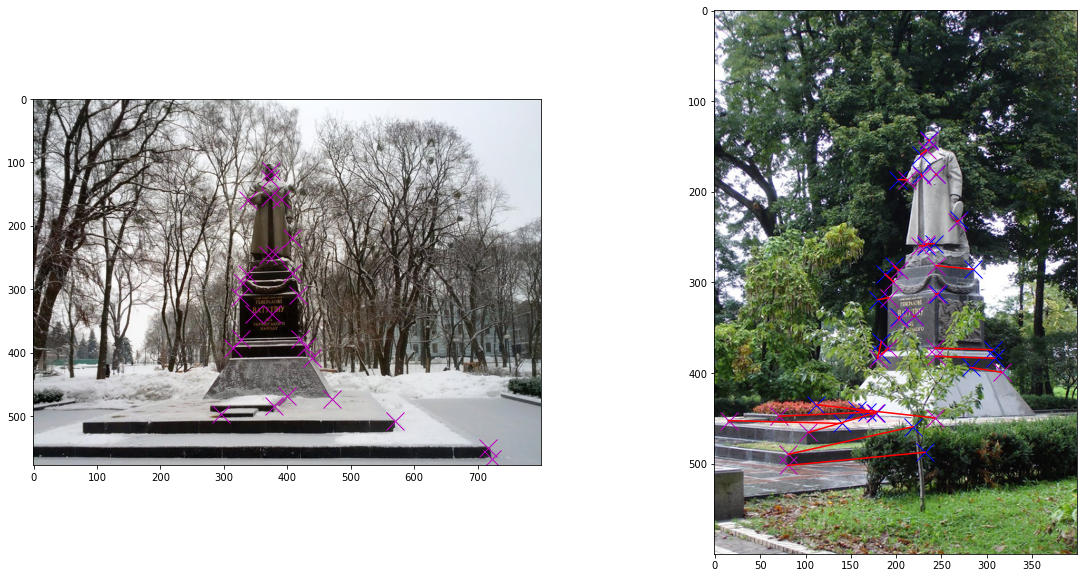

In [ ]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img1)
ax2.imshow(img2)
ax1.plot(corrs[:,0], corrs[:,1], 'mx', markersize=18)
ax2.plot(xy_right[:,2], xy_right[:,3], 'bx', markersize=18)
both = np.stack([corrs[:,2:], xy_right[:,2:]],axis=-1)


ax2.plot(corrs[:,2], corrs[:,3], 'mx', markersize=18)

_ = ax2.plot(both[:,0].T, both[:,1].T, 'r-', markersize=18)










